**<center>Assignment_5_&_6</center>**
**<center>Gauthami
Kuravi</center>**

####  Assignment 5_&_6


<ol>
    <li>Experiment with claims close to 100 claims high utilization boundary. FOr example you can ignore claims in +/- 10 range and see if that affects quality of models. Also investigate accuracy of models by stratifying test data by number of claims. Plot accuracy per number of claims.  </li>
       <li>Conduct sensitivity analysis for the testClaims data for predicting high utilization.</li>
     <li>Select randomly two patients from testmcalims test set. Conduct local sensitivity analysis for the prediction on these patients.</li>
For the above questions, write all your code in a way that you can use it for your semester long projects. It is reasonable to expect that sensitivity analysis of created models will be part of what you turn in in your projects.

</ol>

In [5]:
import sqlite3
import pandas as pd
import os
os.getcwd()
#os.chdir(r'D:')

'D:\\'

In [46]:
df = pd.read_csv('highUtilizationPredictionV2wco.csv')

In [47]:
race = pd.get_dummies(df['race'], dummy_na=False)
df=pd.concat([df,race], axis=1)
# split into training and testing
tr, ts = train_test_split(df, test_size=0.2)
# create list of input attributes
cls = list(df.columns)
cls.remove('race')
cls.remove('patient_id')
cls.remove('claimCount')
cls.remove('HighUtilizationY2')

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score


In [84]:
lr = LogisticRegression(solver='lbfgs', C=0.9, max_iter=1000)
lr.fit(tr[cls],tr['HighUtilizationY2'])
probs = lr.predict_proba(ts[cls])[:,1]
fpr,tpr,thresholds = roc_curve(ts['HighUtilizationY2'],probs)
auc(fpr,tpr)


0.8173724842199489

inpsecting +10/-10 

In [87]:
cnt1 = tr[tr['claimCount']<90]
cnt2= tr[tr['claimCount']>110]
cnt3= tr[tr['claimCount']==100]
tr1 = pd.DataFrame()
tr1 = tr1.append(cnt1)
tr1 = tr1.append(cnt2)
tr1 = tr1.append(cnt3)

In [96]:
lr = LogisticRegression(solver='lbfgs', C=0.9, max_iter=1000)
lr.fit(tr1[cls],tr1['HighUtilizationY2'])
probs = lr.predict_proba(ts[cls])[:,1]
fpr,tpr,thresholds = roc_curve(ts['HighUtilizationY2'],probs)
auc(fpr,tpr)

0.8165971777727014

In [94]:
lr = LogisticRegression(solver='lbfgs', C=0.9, max_iter=1000)
lr.fit(tr[cls],tr['HighUtilizationY2'])
acc = []
for cnt in range(0,300,10):
    tt = ts[(ts['claimCount'] >= cnt) & (ts['claimCount'] < cnt + 10)]
    probs = lr.predict(tt[cls])
    temp = accuracy_score(probs,tt['HighUtilizationY2'])
    print(temp)
    acc.append(temp)

0.9965428937259924
0.9994725738396625
0.9971428571428571
0.995697896749522
0.9954188481675392
0.9960591133004926
0.9929577464788732
0.9864176570458404
0.9787735849056604
0.9706840390879479
0.13427561837455831
0.034482758620689655
0.030303030303030304
0.06976744186046512
0.0851063829787234
0.04395604395604396
0.05714285714285714
0.14925373134328357
0.10638297872340426
0.10869565217391304
0.10526315789473684
0.2222222222222222
0.12
0.11538461538461539
0.2916666666666667
0.05
0.2
0.25
0.05263157894736842
0.3333333333333333


<BarContainer object of 30 artists>

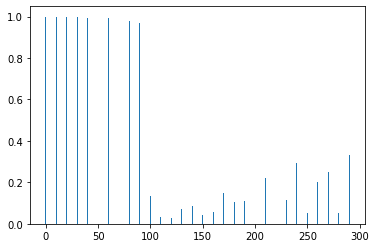

In [95]:
plt.bar(range(0,300,10),acc)

In [50]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(tr[cls], tr['HighUtilizationY2'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [97]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(tr1[cls],tr1['HighUtilizationY2'])
probs = rf.predict_proba(ts[cls])[:,1]
fpr,tpr,thresholds = roc_curve(ts['HighUtilizationY2'],probs)
auc(fpr,tpr)

0.7939741151121334

In [98]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(tr1[cls],tr1['HighUtilizationY2'])
acc1 = []
for cnt in range(0,300,10):
    tt = ts[(ts['claimCount'] >= cnt) & (ts['claimCount'] < cnt + 10)]
    probs = rf.predict(tt[cls])
    temp = accuracy_score(probs,tt['HighUtilizationY2'])
    print(temp)
    acc1.append(temp)

0.9971830985915493
0.9992088607594937
0.9975
0.9952198852772467
0.9960732984293194
0.9911330049261083
0.9929577464788732
0.9881154499151104
0.9811320754716981
0.9706840390879479
0.12367491166077739
0.034482758620689655
0.048484848484848485
0.07751937984496124
0.09574468085106383
0.12087912087912088
0.05714285714285714
0.208955223880597
0.19148936170212766
0.10869565217391304
0.07894736842105263
0.3055555555555556
0.2
0.19230769230769232
0.2916666666666667
0.15
0.2
0.25
0.15789473684210525
0.2


<BarContainer object of 30 artists>

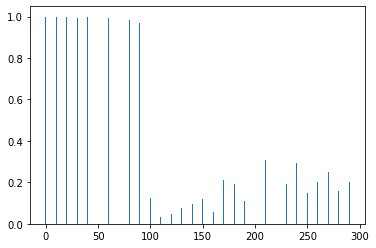

In [100]:
plt.bar(range(0,300,10), acc1)

## check how input factor changes the model prediction

In [70]:
x = df['age'].unique()
x.sort()
x

array([65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       82, 83, 84, 85, 86, 87, 88, 89, 90], dtype=int64)

In [78]:
dist = []
dist1 = []
for a in list(x):
    tt = ts[ts['age'] == a]
    ttt = tr[tr['age'] == a]
    dist.append( rf.predict_proba(tt[cls])[:,1].mean())
    dist1.append( rf.predict_proba(ttt[cls])[:,1].mean())
    

## Plot the both train and test data 

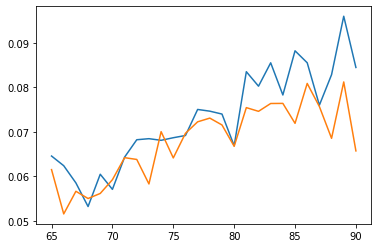

In [79]:
plt.plot(list(x),dist)
plt.plot(list(x),dist1)

In [80]:
y=ts['age'].value_counts().sort_index().values
y

array([1097, 1151, 1265, 1353, 1323, 1153, 1109, 1079, 1029, 1033, 1003,
        964,  885,  791,  790,  725,  724,  681,  620,  570,  531,  472,
        422,  372,  351, 1112], dtype=int64)

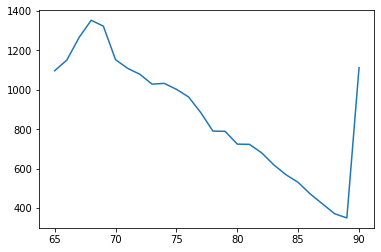

In [81]:
plt.plot(ts['age'].value_counts().sort_index().index,ts['age'].value_counts().sort_index().values)

In [82]:
dist = []
dist1 = []
for a in list(x):
    tt = pd.DataFrame(ts)
    tt['age'] = a
    ttt = pd.DataFrame(tr)
    ttt['age'] = a
    dist.append( rf.predict_proba(tt[cls])[:,1].mean())
    dist1.append( rf.predict_proba(ttt[cls])[:,1].mean())

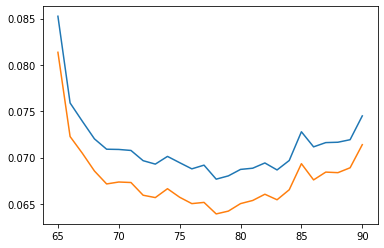

In [83]:
plt.plot(list(x),dist)
plt.plot(list(x),dist1)

In [116]:
import numpy as np
data = []
for a in list(x):
    for i in range(1,1000):
        age = a

        # randomly select ELIX codes
        ELIX = [np.random.randint(2) for i in range(29)]

        # randomly select procedures
        G = [np.random.randint(2) for i in range(22)]

        # randomly select drug counts
        drugs = [np.random.randint(13) for i in range(12)] 

        # zero all races
        A = 0
        AmN = 0
        B = 0
        H = 0
        O = 0
        U = 0
        W = 0
        # and randomly select race
        r = np.random.randint(7)
        if r == 0:
            A = 1
        if r == 1:
            AmN = 1
        if r == 2:
            B = 1
        if r == 3:
            H = 1
        if r == 4:
            O = 1
        if r == 5:
            U = 1
        if r == 6:
            W = 1    
        d = [age] + ELIX + G + drugs + [A, AmN, B, H, O, U, W]
        data.append(d)

In [117]:
Y = rf.predict_proba(data)[:,1]
X = np.array(data)[:,0]

In [119]:
ddd = pd.DataFrame(X, columns=['age'])
ddd['prob'] = Y
YY = ddd.groupby('age').mean()
XX = range(65,91)

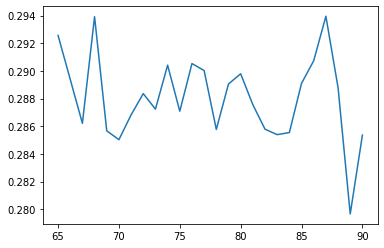

In [123]:
plt.plot(XX,YY)

### Sensitivity Analysis

In [137]:
# generate random data for race = A
lr_res = []
rf_res = []
for i in range(100):
        age = 65+np.random.randint(30)
        ELIX = [np.random.randint(2) for i in range(29)]
        G = [np.random.randint(2) for i in range(22)]
        drugs = [np.random.randint(30) for i in range(12)] 
        A = 1
        AmN = 0
        B = 0
        H = 0
        O = 0
        U = 0
        W = 0
        
        d = [age] + ELIX + G + drugs + [A, AmN, B, H, O, U, W]
        dat = [d]
        lr_res.append(lr.predict_proba(dat)[:,1][0])
        rf_res.append(rf.predict_proba(dat)[:,1][0])
lr_races.append(sum(lr_res)/len(lr_res))
rf_races.append(sum(rf_res)/len(rf_res))

# generate random data for race = AmN
lr_res = []
rf_res = []
for i in range(100):
        age = 65+np.random.randint(30)
        ELIX = [np.random.randint(2) for i in range(29)]
        G = [np.random.randint(2) for i in range(22)]
        drugs = [np.random.randint(30) for i in range(12)] 
        A = 0
        AmN = 1
        B = 0
        H = 0
        O = 0
        U = 0
        W = 0
        
        d = [age] + ELIX + G + drugs + [A, AmN, B, H, O, U, W]
        dat = [d]
        lr_res.append(lr.predict_proba(dat)[:,1][0])
        rf_res.append(rf.predict_proba(dat)[:,1][0])
lr_races.append(sum(lr_res)/len(lr_res))
rf_races.append(sum(rf_res)/len(rf_res))
# generate random data for race = B
lr_res = []
rf_res = []
for i in range(100):
        age = 65+np.random.randint(30)
        ELIX = [np.random.randint(2) for i in range(29)]
        G = [np.random.randint(2) for i in range(22)]
        drugs = [np.random.randint(30) for i in range(12)] 
        A = 0
        AmN = 0
        B = 1
        H = 0
        O = 0
        U = 0
        W = 0
        
        d = [age] + ELIX + G + drugs + [A, AmN, B, H, O, U, W]
        dat = [d]
        lr_res.append(lr.predict_proba(dat)[:,1][0])
        rf_res.append(rf.predict_proba(dat)[:,1][0])
lr_races.append(sum(lr_res)/len(lr_res))
rf_races.append(sum(rf_res)/len(rf_res))
# generate random data for race = H
lr_res = []
rf_res = []
for i in range(100):
        age = 65+np.random.randint(30)
        ELIX = [np.random.randint(2) for i in range(29)]
        G = [np.random.randint(2) for i in range(22)]
        drugs = [np.random.randint(30) for i in range(12)] 
        A = 0
        AmN = 0
        B = 0
        H = 1
        O = 0
        U = 0
        W = 0
        
        d = [age] + ELIX + G + drugs + [A, AmN, B, H, O, U, W]
        dat = [d]
        lr_res.append(lr.predict_proba(dat)[:,1][0])
        rf_res.append(rf.predict_proba(dat)[:,1][0])
lr_races.append(sum(lr_res)/len(lr_res))
rf_races.append(sum(rf_res)/len(rf_res))



# generate random data for race = o
lr_res = []
rf_res = []
for i in range(100):
        age = 65+np.random.randint(30)
        ELIX = [np.random.randint(2) for i in range(29)]
        G = [np.random.randint(2) for i in range(22)]
        drugs = [np.random.randint(30) for i in range(12)] 
        A = 0
        AmN = 0
        B = 0
        H = 0
        O = 1
        U = 0
        W = 0
        
        d = [age] + ELIX + G + drugs + [A, AmN, B, H, O, U, W]
        dat = [d]
        lr_res.append(lr.predict_proba(dat)[:,1][0])
        rf_res.append(rf.predict_proba(dat)[:,1][0])
lr_races.append(sum(lr_res)/len(lr_res))
rf_races.append(sum(rf_res)/len(rf_res))



# generate random data for race = u
lr_res = []
rf_res = []
for i in range(100):
        age = 65+np.random.randint(30)
        ELIX = [np.random.randint(2) for i in range(29)]
        G = [np.random.randint(2) for i in range(22)]
        drugs = [np.random.randint(30) for i in range(12)] 
        A = 0
        AmN = 0
        B = 0
        H = 0
        O = 0
        U = 1
        W = 0
        
        d = [age] + ELIX + G + drugs + [A, AmN, B, H, O, U, W]
        dat = [d]
        lr_res.append(lr.predict_proba(dat)[:,1][0])
        rf_res.append(rf.predict_proba(dat)[:,1][0])
lr_races.append(sum(lr_res)/len(lr_res))
rf_races.append(sum(rf_res)/len(rf_res))


# generate random data for race = W

lr_res = []
rf_res = []
for i in range(100):
        age = 65+np.random.randint(30)
        ELIX = [np.random.randint(2) for i in range(29)]
        G = [np.random.randint(2) for i in range(22)]
        drugs = [np.random.randint(30) for i in range(12)] 
        A = 0
        AmN = 0
        B = 0
        H = 0
        O = 0
        U = 0
        W = 1
        
        d = [age] + ELIX + G + drugs + [A, AmN, B, H, O, U, W]
        dat = [d]
        lr_res.append(lr.predict_proba(dat)[:,1][0])
        rf_res.append(rf.predict_proba(dat)[:,1][0])
lr_races.append(sum(lr_res)/len(lr_res))
rf_races.append(sum(rf_res)/len(rf_res))

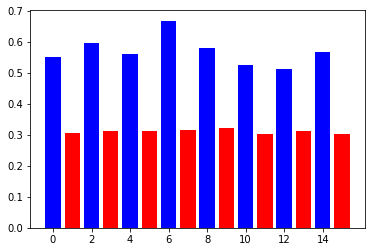

In [140]:
plt.bar(range(0,len(lr_races)*2,2), lr_races, color='b')
plt.bar(range(1,len(lr_races)*2,2), rf_races, color='r')
plt.xticks(range(0,len(lr_races)*2,2))
plt.show()

## Select randomly 2 patients from test claims


In [143]:
p = rf.predict_proba(ts[cls])
np.where(p[:,1] > 0.7)

(array([ 1209,  1987,  2598,  3452,  3910,  3995,  4607,  4845,  5000,
         5031,  5070,  5216,  5723,  5762,  6356,  6574,  7075,  7183,
         7335,  7493,  7936,  8385,  9013,  9362,  9395,  9606, 10612,
        11304, 11346, 11390, 12189, 12656, 13165, 13536, 15537, 16366,
        16656, 16831, 17235, 17339, 18772, 19869, 20326, 20567, 20760,
        21022, 21206, 21627, 22183, 22291], dtype=int64),)

In [146]:
p1 = rf.predict_proba(ts[cls])
np.where(p1[:,1] <0.3)

(array([    0,     1,     2, ..., 22602, 22603, 22604], dtype=int64),)

In [154]:
test_case = ts.iloc[9013]
test_case1 = ts.iloc[2]

In [155]:
binary_cols = {}
numeric_cols = {}
for c in cls:
    cnt = len(tr[c].value_counts().index)
    mnv = tr[c].min()
    mxv = tr[c].max()
    if cnt > 2:
        avg = tr[c].mean()
        std = tr[c].std()
        #print(c, cnt, mnv, mxv, avg, std)
        numeric_cols[c] = (cnt, mnv, mxv, avg, std)
    elif cnt == 2:
        binary_cols[c] = (cnt, mnv, mxv)

In [156]:
def combinations(test_case, binary_cols, numeric_cols):
    dat = pd.DataFrame()
    #Work on binary variables
    for v in binary_cols:
        #print(binary_cols[v])
        # assume that if min is 0 and value in test case is 0, the eature is not present, so fe flit to the other value
        #print( binary_cols[v][1], test_case[v] )
        if (test_case[v] == binary_cols[v][1]): # at the lower value
            #print(v)
            newcase = test_case.copy()
            newcase[v] = binary_cols[v][2]
            newcase['changed_var'] = v
            newcase['dir'] = '+'
            newcase['type'] = 'b'
            #print(newcase)
            dat=dat.append(newcase)
        else:
            #print(v)
            newcase = test_case.copy()
            newcase[v] = binary_cols[v][1]
            newcase['changed_var'] = v
            newcase['dir'] = '-'
            newcase['type'] = 'b'
            #print(newcase)
            dat=dat.append(newcase)   


    # now work on numeric variables
    for v in numeric_cols:
        # assume that we do not change values which are at their lowest value
        
            print(v)
            # val + sd
            newcase = test_case.copy()
            newcase[v] = min(newcase[v] + numeric_cols[v][4], numeric_cols[v][2] )
            newcase['changed_var'] = v
            newcase['dir'] = '+'
            newcase['type'] = 'n'
            dat=dat.append(newcase)
            # val -sd
            newcase = test_case.copy()
            newcase[v] = max(newcase[v] - numeric_cols[v][4], numeric_cols[v][1] )
            newcase['changed_var'] = v
            newcase['dir'] = '-'
            newcase['type'] = 'n'
            dat=dat.append(newcase)
    return dat

In [157]:
dat = combinations(test_case, binary_cols, numeric_cols)

drugs_m0-1
drugs_m1-2
drugs_m2-3
drugs_m3-4
drugs_m4-5
drugs_m5-6
drugs_m6-7
drugs_m7-8
drugs_m8-9
drugs_m9-10
drugs_m10-11
drugs_m11-12


In [158]:
def predict_combinations(dat, clf, pr):
    probs = clf.predict_proba(dat[cls])
    d = pd.DataFrame(dat[['type','changed_var','dir']])
    d['prob'] = probs[:,1]
    d['change'] = probs[:,1] - pr
    return d.sort_values('change', ascending=False) 
    

## Preditions on Patient1

In [160]:
pr = rf.predict_proba([test_case[cls]])[:,1]
d = predict_combinations(dat, rf, pr)
d

,type,changed_var,dir,prob,change
27757,b,W,-,0.800000,0.070000
27757,b,ELIX27,-,0.800000,0.070000
27757,b,ELIX10,+,0.760000,0.030000
27757,b,B,+,0.760000,0.030000
27757,b,G-5,+,0.750000,0.020000
27757,b,ELIX4,+,0.750000,0.020000
27757,b,H,+,0.740000,0.010000
27757,b,G-8,+,0.730000,0.000000
27757,b,G-10,+,0.730000,0.000000
27757,b,ELIX2,+,0.730000,0.000000


In [161]:
print("main confirming factors -- the numbers indicate probability in the case thee factors were not present:")
print(d[(((d['type'] =='b') & (d['dir'] =='-')) | ((d['type'] =='n') & (d['dir'] =='-'))) & (d['change'] < 0)].sort_values('change')[:10])
print("main disconfirming factors:")
print(d[(((d['type'] =='b') & (d['dir'] =='-')) | ((d['type'] =='n') & (d['dir'] =='-'))) & (d['change'] > 0)].sort_values('change')[-10:])


main confirming factors -- the numbers indicate probability in the case thee factors were not present:
      type changed_var dir      prob    change
27757    b      ELIX14   -  0.170000 -0.560000
27757    b       ELIX6   -  0.430000 -0.300000
27757    b        G-21   -  0.490000 -0.240000
27757    b        G-22   -  0.496667 -0.233333
27757    b      ELIX18   -  0.500000 -0.230000
27757    b        G-12   -  0.510000 -0.220000
27757    b         G-2   -  0.570000 -0.160000
27757    b      ELIX13   -  0.600000 -0.130000
27757    b        G-17   -  0.610000 -0.120000
27757    b      ELIX21   -  0.630000 -0.100000
main disconfirming factors:
      type changed_var dir  prob  change
27757    b           W   -   0.8    0.07
27757    b      ELIX27   -   0.8    0.07


## Prediction on Patient2

In [163]:
dat = combinations(test_case1, binary_cols, numeric_cols)


drugs_m0-1
drugs_m1-2
drugs_m2-3
drugs_m3-4
drugs_m4-5
drugs_m5-6
drugs_m6-7
drugs_m7-8
drugs_m8-9
drugs_m9-10
drugs_m10-11
drugs_m11-12


In [166]:
pr = rf.predict_proba([test_case1[cls]])[:,1]
d = predict_combinations(dat, rf, pr)


In [165]:
print("main confirming factors -- the numbers indicate probability in the case thee factors were not present:")
print(d[(((d['type'] =='b') & (d['dir'] =='-')) | ((d['type'] =='n') & (d['dir'] =='-'))) & (d['change'] < 0)].sort_values('change')[:10])
print("main disconfirming factors:")
print(d[(((d['type'] =='b') & (d['dir'] =='-')) | ((d['type'] =='n') & (d['dir'] =='-'))) & (d['change'] > 0)].sort_values('change')[-10:])


main confirming factors -- the numbers indicate probability in the case thee factors were not present:
      type changed_var dir      prob    change
76929    b        G-13   -  0.000000 -0.010605
76929    b           W   -  0.000299 -0.010306
76929    b      ELIX26   -  0.001639 -0.008966
main disconfirming factors:
Empty DataFrame
Columns: [type, changed_var, dir, prob, change]
Index: []
